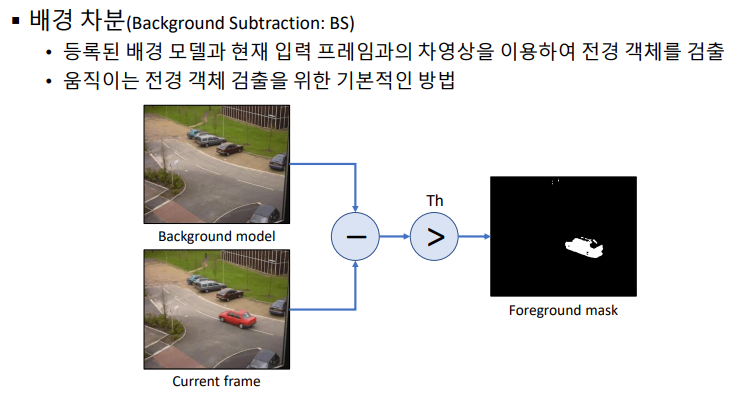

배경모델을 빼는 연산을 합니다. 동영상에서 움직이는 객체를 검출하는 기법중 가장 기본적인 기법이죠. 배경영상과 다른부분을 찾아서, 이게 새로 들어온 객체라고 판단을 하는 것입니다.

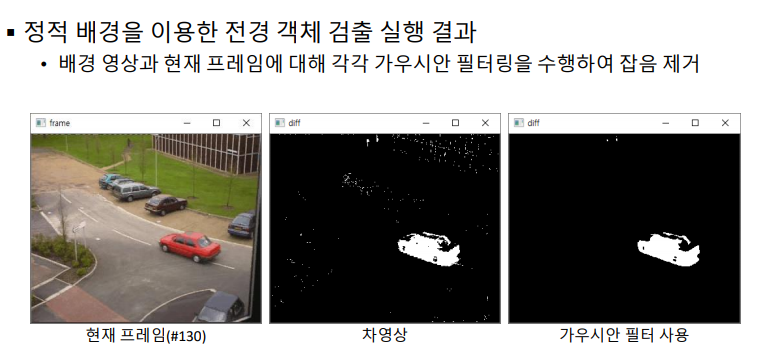

In [2]:
import sys 
import numpy as np 
import cv2 
import matplotlib.pyplot as plt 
import random 
!pip install opencv-python

In [17]:
cap = cv2.VideoCapture('PETS2000.avi')

if not cap.isOpened():

    print('Video open failed!')

    sys.exit()

배경 영상을 등록합니다. 첫번째 프레임을 배경영상으로 하죠.

In [18]:
ret, back = cap.read()

In [19]:
if not ret:

    print('Background image registration failed!')

    sys.exit()

그레이스케일로 하면 연산속도가 빠르니 그레이스케일로 바꾸어 줍니다.

In [20]:
back = cv2.cvtColor(back, cv2.COLOR_BGR2GRAY)

입력영상의 노이즈를 좀 죽여보겠습니다. 사이즈는 0,0을 주시고, 시그마는 1.0을 주는게 좋습니다.

In [21]:
back = cv2.GaussianBlur(back, (0, 0), 1.0)

In [22]:
while True:

    ret, frame = cap.read()

    #한프레임씩 받는다.

    if not ret:

        break


    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    #프레임 영상또한 그레이 스케일로 변환을 한다.
    

    gray = cv2.GaussianBlur(gray, (0, 0), 1.0)

    #프레임또한 블러로 한다.



    # 차영상 구하기 & 이진화

    diff = cv2.absdiff(gray, back)

    #빼가지고 절대값을 씌워서 반환을 해준다.

    _, diff = cv2.threshold(diff, 30, 255, cv2.THRESH_BINARY)

    #차이값이 30이상이면 255로 만들고 작으면 0으로 만든다.

    #30차이를 두는것은 노이즈일수있으니까 노이즈는 무시하도록 합니다.

    #첫번째값은 스레시홀드값이므로 무시합니다. _,

    cv2.imshow('frame', frame)

    cv2.imshow('diff', diff)



    if cv2.waitKey(30) == 27:

 #0으로 하면 무한대라 프레임이 안넘어간다. 30프레임이면 그에맞게하자 50으로 하면 50주면 50ms라 더 느림 프레임과 상대적으로 설정해주면된다.

        break

    
cap.release()

cv2.destroyAllWindows()

